## Example Contrail Grid Data Product

- Time: `2022-01-10 00:00:00` - `2022-01-10 11:00:00` (12 hours)
- Aircraft: *A320*
- Flight heading: *90*
- Flight speed: *set to nominal for flight level*

### Data Access

- Available in storage bucket [gs://contrail-grid-demo-data](https://console.cloud.google.com/storage/browser/contrails-301217-grid-sample-data)
- Download using [google-cloud-sdk](https://cloud.google.com/sdk/docs/quickstart) command line tools

```
# download netcdf files
$ gsutil -m cp -r gs://contrails-301217-grid-sample-data/netcdf netcdf

# download zarr files
$ gsutil -m cp -r gs://contrails-301217-grid-sample-data/zarr zarr
```

This notebook requires [xarray](https://xarray.pydata.org/en/stable/index.html) to read NetCDF files

```
$ pip install xarray
```

In [23]:
import xarray as xr
import numpy as np

### Load Data

In [24]:
# open single hour
filename = "data/netcdf_20220110.00.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:       (longitude: 1440, latitude: 641, level: 4, time: 1)
Coordinates:
  * longitude     (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude      (latitude) float64 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * level         (level) float64 200.0 225.0 250.0 300.0
  * time          (time) datetime64[ns] 2022-01-10
    air_pressure  (level) float64 ...
    altitude      (level) float64 ...
Data variables:
    ef_per_m      (longitude, latitude, level, time) float64 ...
Attributes:
    description:    Contrail evolution results
    aircraft_type:  A320
    azimuth:        90

In [25]:
# open all hours
filenames = "data/*.nc"
ds = xr.open_mfdataset(filenames)
ds

<xarray.Dataset>
Dimensions:       (longitude: 1440, latitude: 641, level: 4, time: 12)
Coordinates:
  * longitude     (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude      (latitude) float64 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * level         (level) float64 200.0 225.0 250.0 300.0
  * time          (time) datetime64[ns] 2022-01-10 ... 2022-01-10T11:00:00
    air_pressure  (level) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    altitude      (level) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Data variables:
    ef_per_m      (longitude, latitude, level, time) float64 dask.array<chunksize=(1440, 641, 4, 1), meta=np.ndarray>
Attributes:
    description:    Contrail evolution results
    aircraft_type:  A320
    azimuth:        90

### Plot data

In [26]:
# open single hour
filename = "data/netcdf_20220110.01.nc"
ds = xr.open_dataset(filename)

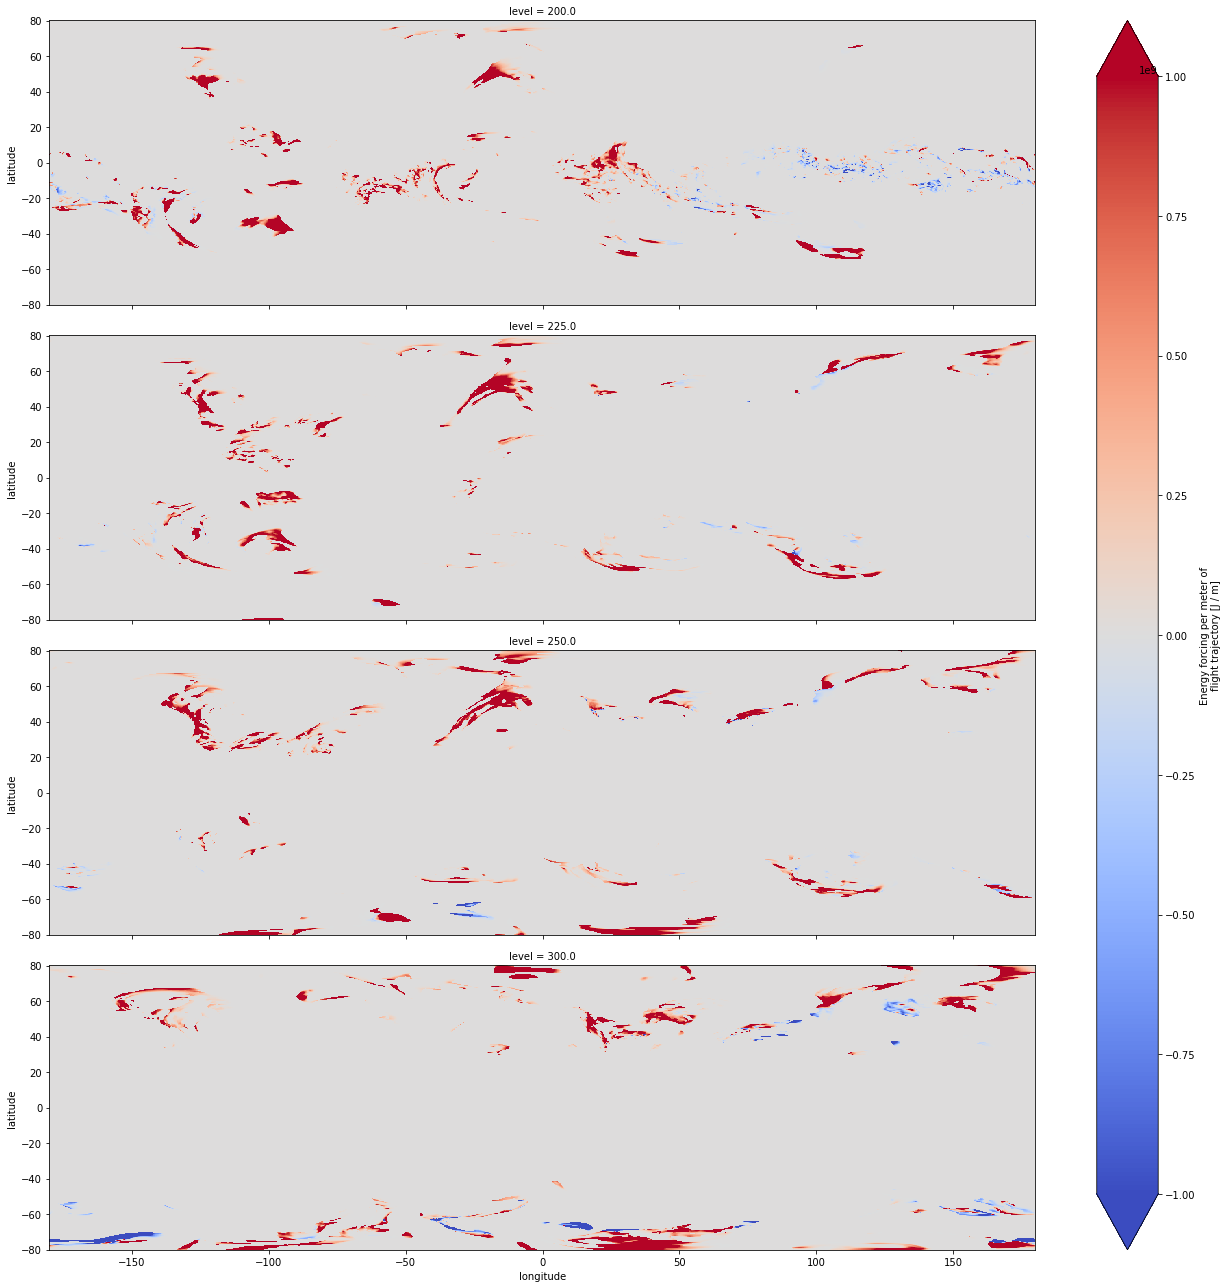

In [31]:
# select a single pressure level for "ef_per_m"
da = ds["ef_per_m"]

# plot
da.squeeze().plot(x="longitude", y="latitude", row="level", figsize=(18, 18), vmin=-1e9, vmax=1e9, cmap="coolwarm");

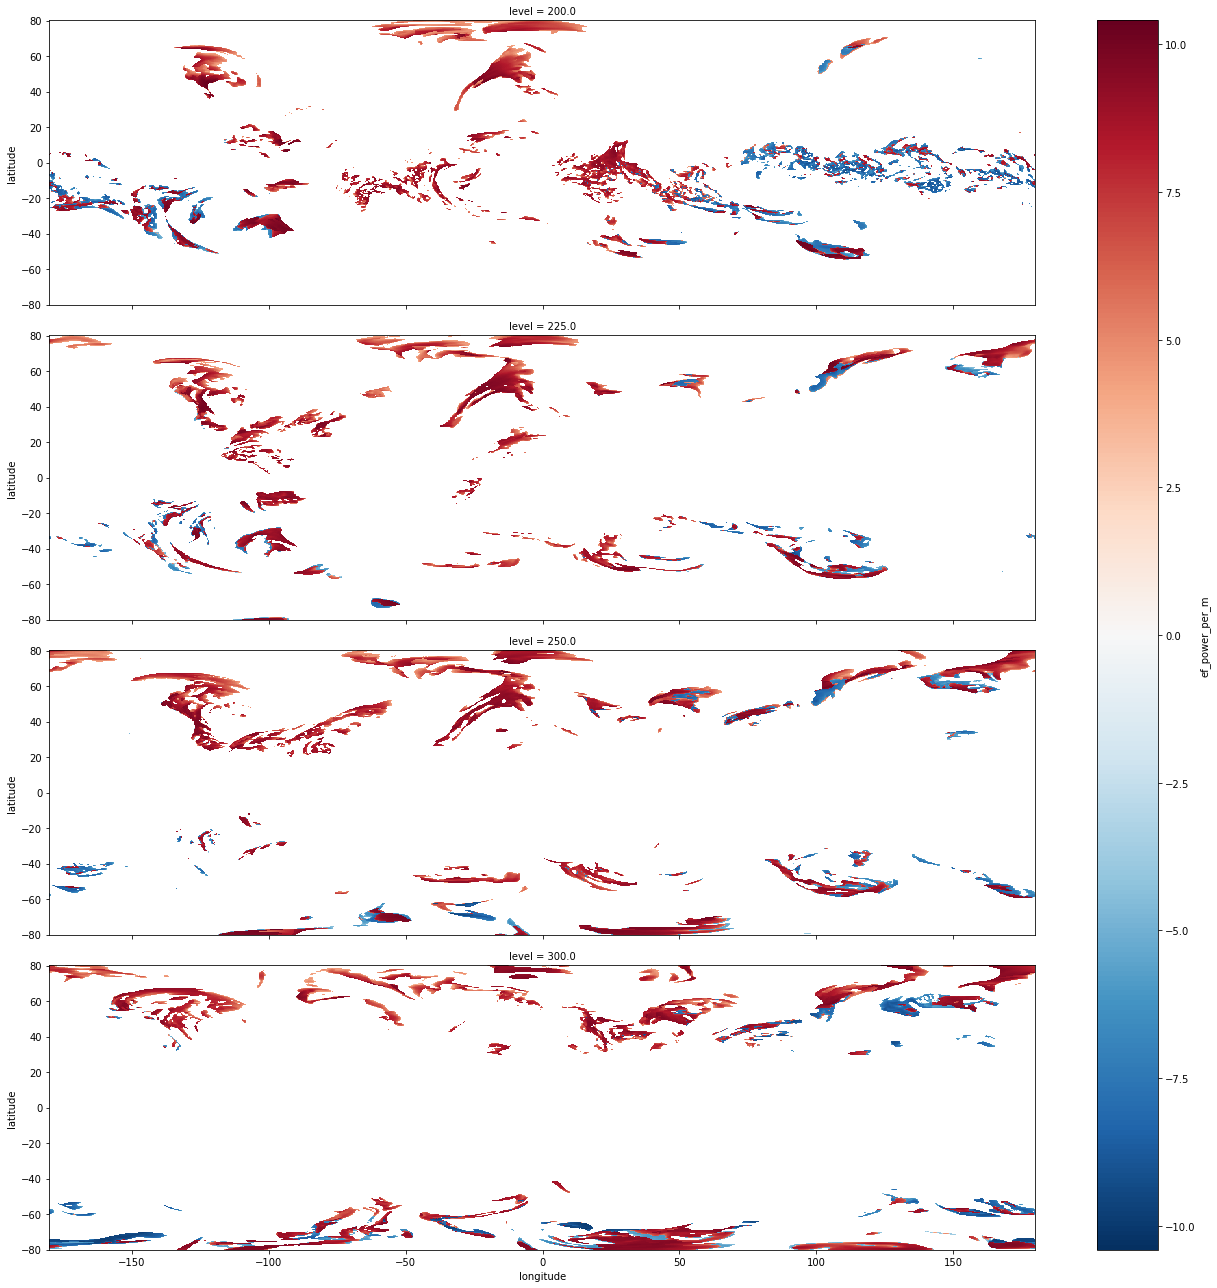

In [30]:
# show on log scale
ef = ds["ef_per_m"].where(ds["ef_per_m"] != 0)
log_ef = np.sign(ef) * np.log10(np.abs(ef))
log_ef.name = 'ef_power_per_m'

# plot
log_ef.squeeze().plot(x="longitude", y="latitude", row="level", figsize=(18, 18));